## LAB 1 ASSIGNMENT: GAPMINDER

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, scale_size, scale_color_brewer, labs, theme_minimal,xlim

## TASK 1

> ### 1.Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

x-axis: Income 

y-axis: Life expectancy (in years)

Size of bubbles: Population (represented by the size of each bubble)

Color of bubbles: World regions (the regions are color-coded, as per the legend on the right)

>  ### 2.Import the q1data.csv dataset.

In [2]:
data1 = pd.read_csv('q1data.csv')

In [3]:
data1.head(10)

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
5,17600.0,76.0,88000.0,2010,Antigua and Barbuda,americas,america,america_north,Latin America & Caribbean
6,24600.0,76.0,40900000.0,2010,Argentina,americas,america,america_south,Latin America & Caribbean
7,9730.0,74.2,2880000.0,2010,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia
8,45600.0,82.3,22200000.0,2010,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
9,53300.0,81.0,8410000.0,2010,Austria,europe,europe_central_asia,europe_west,Europe & Central Asia


In [4]:
data1.dropna(inplace=True)

In [5]:
data1.isnull().sum()

income               0
life_exp             0
population           0
year                 0
country              0
four_regions         0
six_regions          0
eight_regions        0
world_bank_region    0
dtype: int64

> ### 3. Recreate the plot as best you can using plotnine

/Users/snehanarayanan/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


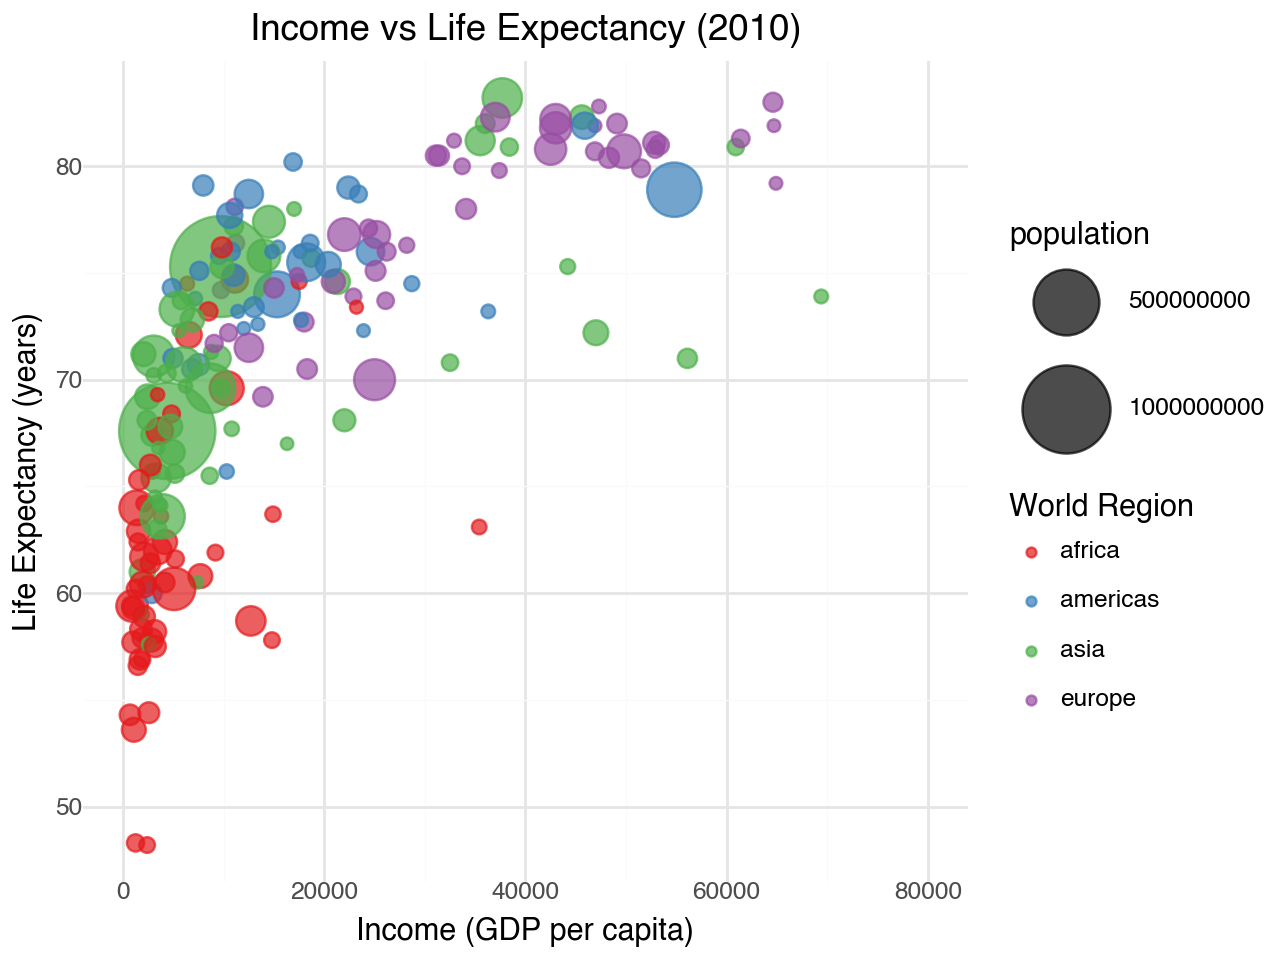

In [38]:
plot = (
    ggplot(data1, aes(x='income', y='life_exp', size='population', color='four_regions')) +
    geom_point(alpha=0.7) +
    scale_size(range=(2, 20)) +  
    scale_color_brewer(type='qual', palette='Set1') +  
    labs(
        x='Income (GDP per capita)',
        y='Life Expectancy (years)',
        color='World Region',
        title='Income vs Life Expectancy (2010)',
    ) +
    xlim(0, 80000) +  
    theme_minimal()
)

plot.show()

> ### 4.What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

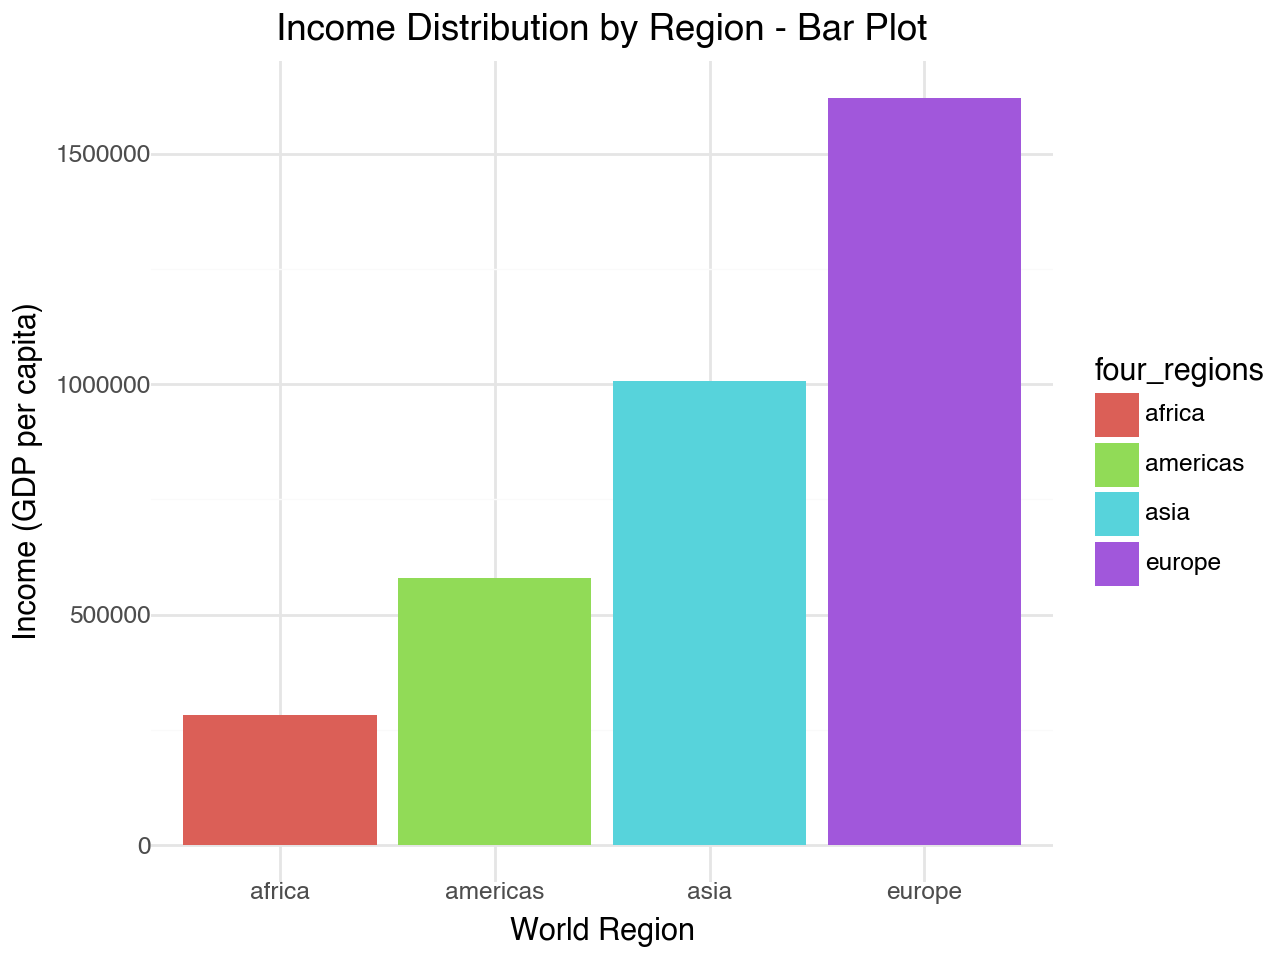

In [9]:
from plotnine import geom_bar

plot = (
    ggplot(data1, aes(x='four_regions', y='income', fill='four_regions')) +
    geom_bar(stat='identity') +
    labs(
        x='World Region',
        y='Income (GDP per capita)',
        title='Income Distribution by Region - Bar Plot'
    ) +
    theme_minimal()
)

plot

> #### Bar plots are better for comparing discrete categories or aggregated data. In this case, we lose the detail of the continuous relationship between income and life expectancy for each country.

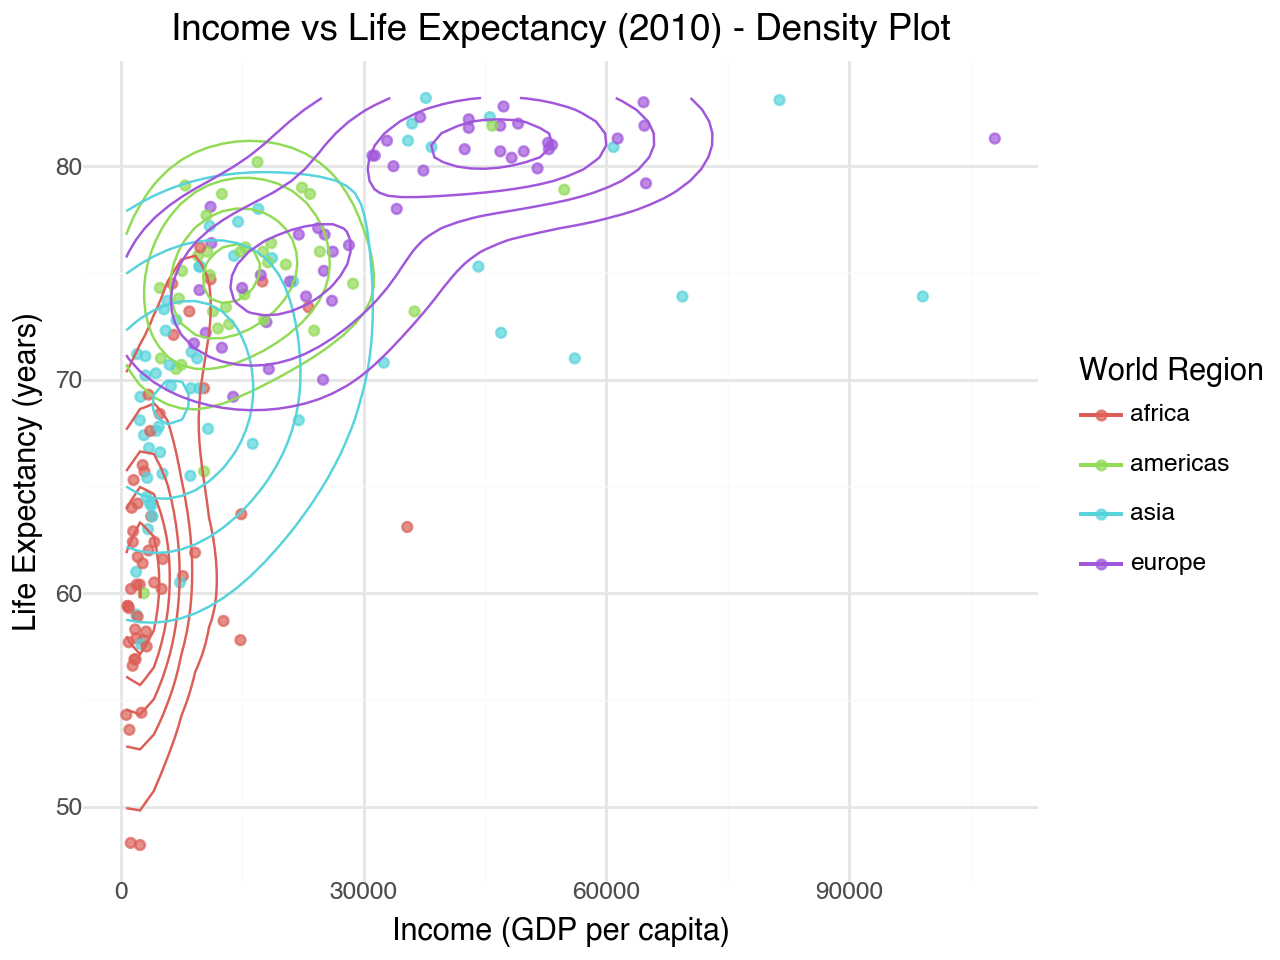

In [7]:
from plotnine import geom_density_2d

plot = (
    ggplot(data1, aes(x='income', y='life_exp', color='four_regions')) +
    geom_point(alpha=0.7) +
    geom_density_2d() +  # Adds contour lines to show density
    labs(
        x='Income (GDP per capita)',
        y='Life Expectancy (years)',
        color='World Region',
        title='Income vs Life Expectancy (2010) - Density Plot'
    ) +
    theme_minimal()
)

plot

### *It's Good because:*

> geom_density_2d helps visualize areas where countries cluster on the income-life expectancy plane.

> It gives a sense of the concentration of countries in different income ranges and life expectancy levels.

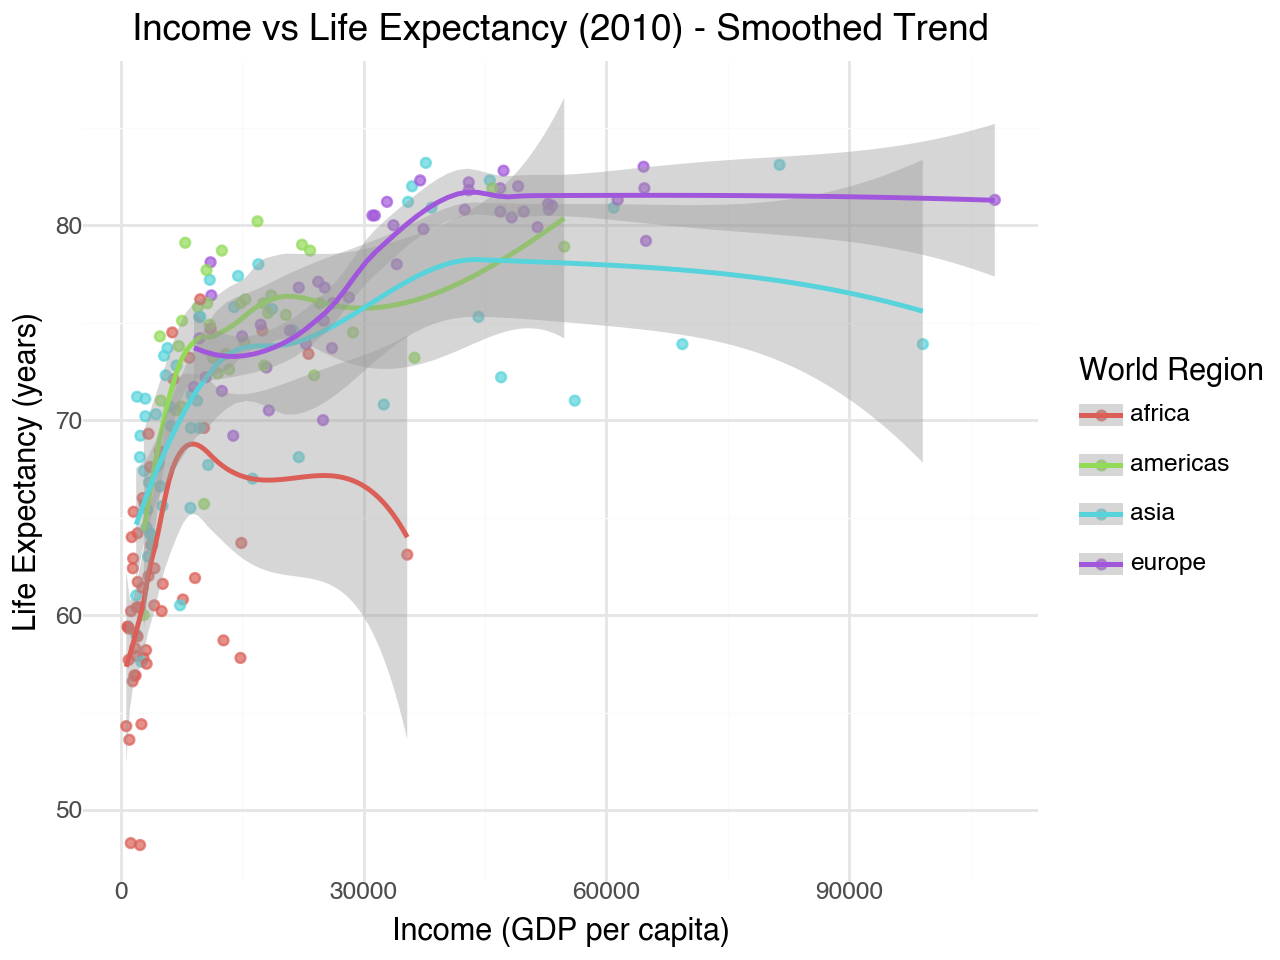

In [8]:
from plotnine import geom_smooth

plot = (
    ggplot(data1, aes(x='income', y='life_exp', color='four_regions')) +
    geom_point(alpha=0.7) +
    geom_smooth(method='loess', se=True) +  # Adds a smoothed line with confidence intervals
    labs(
        x='Income (GDP per capita)',
        y='Life Expectancy (years)',
        color='World Region',
        title='Income vs Life Expectancy (2010) - Smoothed Trend'
    ) +
    theme_minimal()
)

plot

## TASK 2

> ### 1.Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

In [10]:
data2 = pd.read_csv('q2data.csv')